### For my project, I created a project on Google Cloud, and set up a SQL server via the Google Cloud project interface.  Once the project was set up, I created a new database, a table, and read/wrote data to this database.  The steps I followed, and code I wrote are shown below.

In [1]:
conda install pyodbc 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Before getting started with any code, we have to set up a project on Google Cloud.  I set up a SQL Server project using the Google Cloud console.  Once the project is set up, we need a Cloud SQL Proxy to connect.  The proxy is downloaded and installed via the command line, and started using this command:

 ./cloud_sql_proxy -instances= INSTANCE_CONNECTION_NAME =tcp:1433 \ -credential_file PATH_TO_KEY_FILE &

In [29]:
import pyodbc

connection = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=127.0.0.1;UID=sqlserver;PWD=password5')
cursor = connection.cursor()

In [31]:
#create database
connection.autocommit=True
cursor.execute("DROP DATABASE IF EXISTS studentcoursedatabase")
cursor.execute("CREATE DATABASE studentcoursedatabase")

In [32]:
#check if db exists
db = cursor.execute("SELECT name FROM master.sys.databases")
for row in cursor:
        db_name = row[0]
        print(db_name)

master
tempdb
model
msdb
studentcoursedatabase


In [33]:
#create a new connection to our specific test database, create a table in this database
connection = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=127.0.0.1;DATABASE=studentcoursedatabase;UID=sqlserver;PWD=steelers5')
connection.autocommit=True
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS courseTable")
cursor.execute("CREATE TABLE courseTable (student_name CHAR(40),course_name CHAR(40), semester CHAR(20),course_rating INT, grade CHAR(2), instructor CHAR(40))")

In [34]:
#Now, we can insert data into our newly created table
#I created a csv with data on which classes I've taken in the JHU masters program
import pandas as pd

df = pd.read_csv('/Users/dzikipm1/Documents/courses.csv')
df.head()
for index,row in df.iterrows():
    cursor.execute("INSERT INTO courseTable([student_name],[course_name], [semester], [course_rating], [grade], [instructor]) values(?,?,?,?,?,?)", row['MyName'], row['Course'], row['Semester'], row['Rating'], row['Grade'], row['Instructor'])
connection.commit()

In [35]:
#let's see if we correctly wrote our data to the table

query = "SELECT * FROM courseTable;"
df = pd.read_sql(query, connection)
df.head()

,student_name,course_name,semester,course_rating,grade,instructor
0,Pete Dziki,Computer Organization,Summer 2019,4,A-,Kann
1,Pete Dziki,Data Structures,Summer 2019,7,A,Kann
2,Pete Dziki,Foundations of Algorithms,Fall 2019,9,B,Gearhart
3,Pete Dziki,Foundations of Software Engineering,Fall 2019,7,A-,Demasco
4,Pete Dziki,Foundations of Computer Architecture,Fall 2019,2,A-,Kann


In [13]:
#now we want to change this table, to add indivifual records
cursor.execute("INSERT INTO courseTable([student_name],[course_name], [semester], [course_rating], [grade], [instructor]) values(?,?,?,?,?,?)", ("Joe Smith", "Artificial Intelligence", "Fall 2019", 6,"A-", "Jackson"))
cursor.execute("INSERT INTO courseTable([student_name],[course_name], [semester], [course_rating], [grade], [instructor]) values(?,?,?,?,?,?)", ("Mark Jones", "Robotics", "Spring 2018", 8,"C", "Lapin"))
connection.commit()

In [27]:
query = "SELECT [student_name] FROM courseTable WHERE course_name = 'Robotics';"
df = pd.read_sql(query, connection)
df

,student_name
0,Pete Dziki
1,Mark Jones


In [40]:
query = "EXEC sp_columns courseTable;"
df = pd.read_sql(query, connection)
df

,TABLE_QUALIFIER,TABLE_OWNER,TABLE_NAME,COLUMN_NAME,DATA_TYPE,TYPE_NAME,PRECISION,LENGTH,SCALE,RADIX,NULLABLE,REMARKS,COLUMN_DEF,SQL_DATA_TYPE,SQL_DATETIME_SUB,CHAR_OCTET_LENGTH,ORDINAL_POSITION,IS_NULLABLE,SS_DATA_TYPE
0,studentcoursedatabase,dbo,courseTable,student_name,1,char,40,40,NaN,NaN,1,None,None,1,None,40.0,1,YES,39
1,studentcoursedatabase,dbo,courseTable,course_name,1,char,40,40,NaN,NaN,1,None,None,1,None,40.0,2,YES,39
2,studentcoursedatabase,dbo,courseTable,semester,1,char,20,20,NaN,NaN,1,None,None,1,None,20.0,3,YES,39
3,studentcoursedatabase,dbo,courseTable,course_rating,4,int,10,4,0.0,10.0,1,None,None,4,None,NaN,4,YES,38
4,studentcoursedatabase,dbo,courseTable,grade,1,char,2,2,NaN,NaN,1,None,None,1,None,2.0,5,YES,39
5,studentcoursedatabase,dbo,courseTable,instructor,1,char,40,40,NaN,NaN,1,None,None,1,None,40.0,6,YES,39


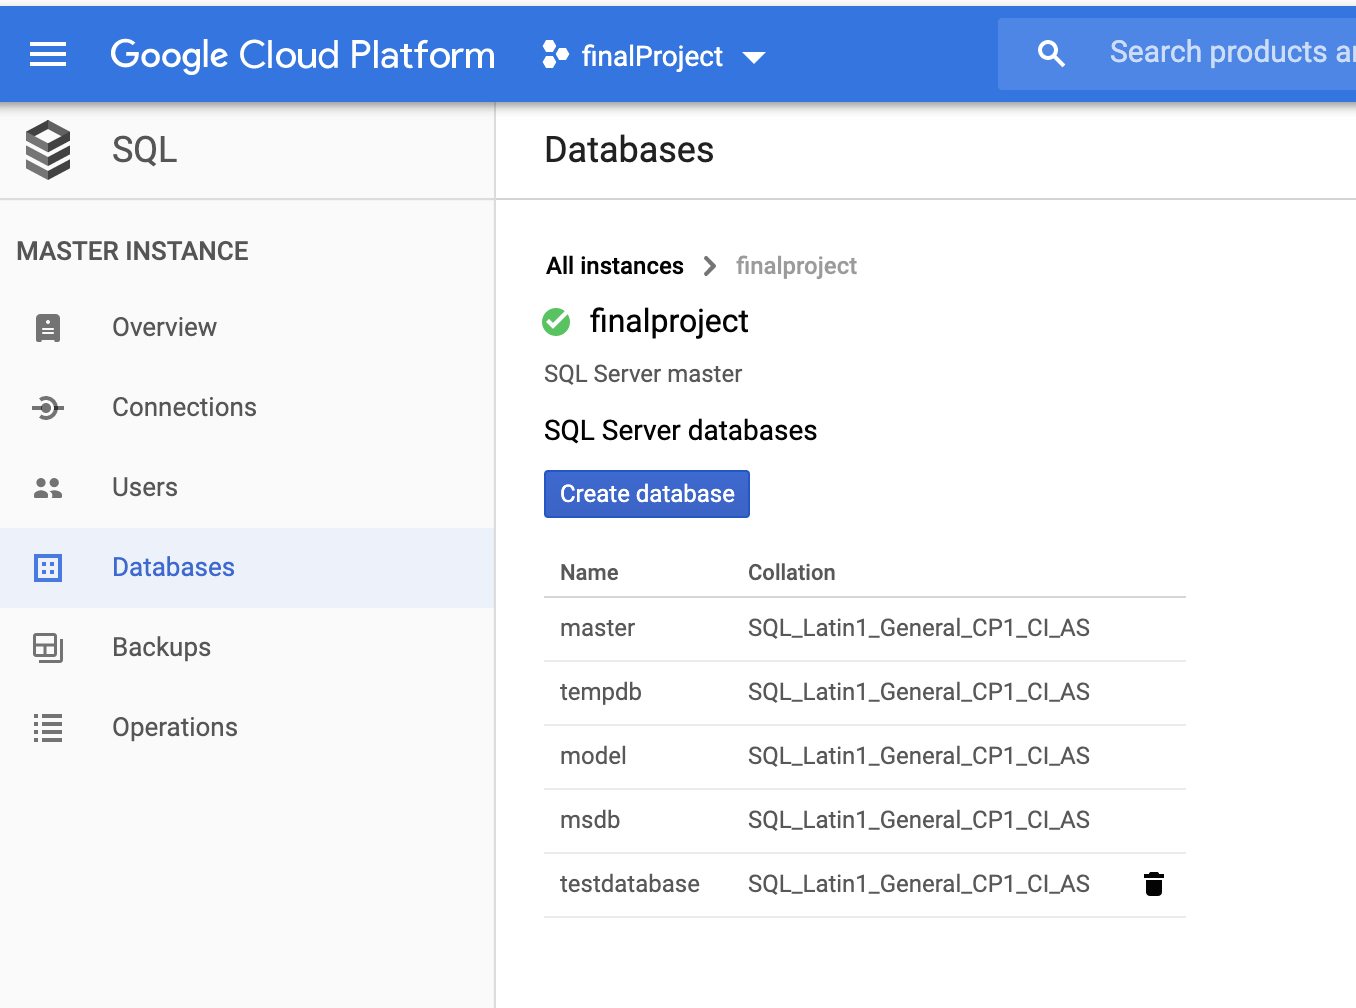

In [15]:
#Now, if we go to google cloud, we can see testdatabase has been created.  
#You can also see there's a button that allows you to manually create a database.

from IPython.display import Image
Image("/Users/dzikipm1/Documents/clouddb.png")